# Simple Linear Regression

In [3]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Reading the dataset
df=pd.read_csv("height-weight.csv")

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Distribution of data in the data set')

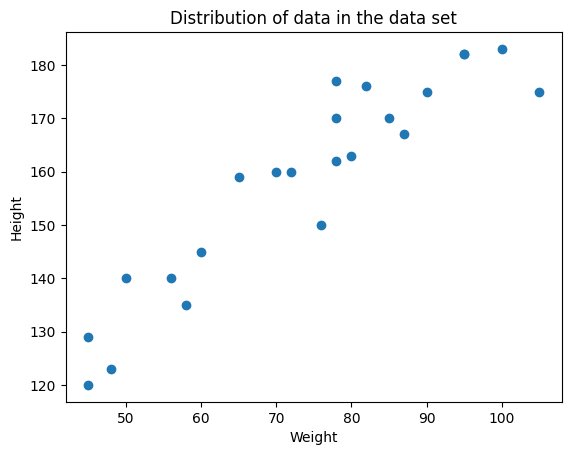

In [12]:
# plotting all the data
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Distribution of data in the data set")

# Steps for creating a model
## 1-Divide the dataset into independent and dependent feature
## 2-Apply train test split on independent and the dependent feature
## 3-Standardize the training dataset 
## 4-Train the model

In [13]:
#Step-`
X=df[["Weight"]]#Independent feature
y=df[["Height"]]#Dependent Feature

In [16]:
X,y

(    Weight
 0       45
 1       58
 2       48
 3       60
 4       70
 5       78
 6       80
 7       90
 8       95
 9       78
 10      82
 11      95
 12     105
 13     100
 14      85
 15      78
 16      50
 17      65
 18      76
 19      87
 20      45
 21      56
 22      72,
     Height
 0      120
 1      135
 2      123
 3      145
 4      160
 5      162
 6      163
 7      175
 8      182
 9      170
 10     176
 11     182
 12     175
 13     183
 14     170
 15     177
 16     140
 17     159
 18     150
 19     167
 20     129
 21     140
 22     160)

In [18]:
#Step-2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [20]:
X,X_train

(    Weight
 0       45
 1       58
 2       48
 3       60
 4       70
 5       78
 6       80
 7       90
 8       95
 9       78
 10      82
 11      95
 12     105
 13     100
 14      85
 15      78
 16      50
 17      65
 18      76
 19      87
 20      45
 21      56
 22      72,
     Weight
 12     105
 1       58
 13     100
 5       78
 2       48
 11      95
 20      45
 3       60
 4       70
 18      76
 16      50
 21      56
 22      72
 7       90
 10      82
 14      85
 19      87
 6       80)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18, 1), (5, 1))

In [22]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()#Intializing the StandardScaler Object

In [24]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [25]:
X_train=scaler.fit_transform(X_train)#Standardize the training data
X_test=scaler.fit_transform(X_test)

In [26]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [27]:
X_test

array([[ 0.34927086],
       [ 0.34927086],
       [-1.63795991],
       [ 1.37299581],
       [-0.43357762]])

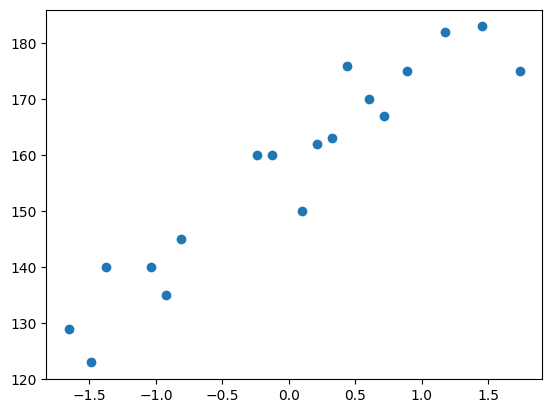

In [28]:
# Plotting the X_train and Y_traind data
plt.scatter(X_train,y_train)

In [29]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [30]:
regressor=LinearRegression()

In [31]:
regressor.fit(X_train,y_train)

LinearRegression()

In [32]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept is:",regressor.intercept_)

The slope or coefficient of weight is  [[17.03440872]]
Intercept is: [157.5]


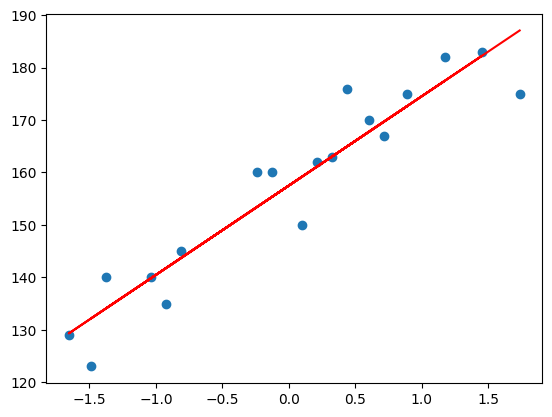

In [33]:
## Plotting the best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),"r")

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [35]:
y_pred_test=regressor.predict(X_test)

In [36]:
y_pred_test,y_test

(array([[163.44962265],
        [163.44962265],
        [129.59832137],
        [180.88817179],
        [150.11426154]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

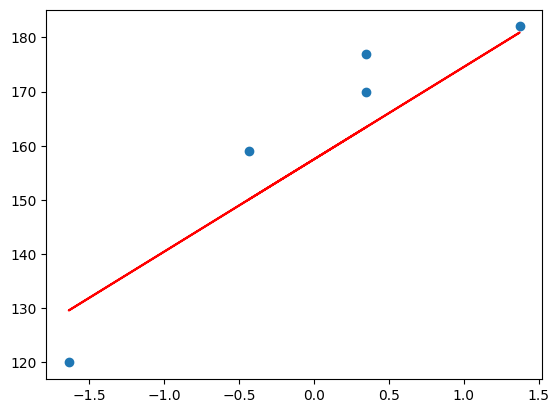

In [37]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),"r")

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

79.76809057832979
7.9393285483063725
8.931298370244372


In [41]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [42]:
score

0.8379487839705635

# Adjusted R Squre

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [45]:
# Display adjusted R-squred
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7839317119607513

In [46]:
regressor

LinearRegression()

In [48]:
# new data point
scaled_weight=scaler.transform([[80]])
scaled_weight

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.46970909]])

In [49]:
scaled_weight[0]

array([0.46970909])

In [50]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [[165.50121667]]


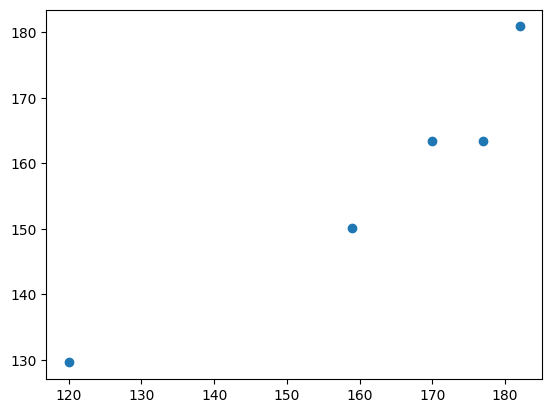

In [52]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [53]:
## Residuals
residuals=y_test-y_pred_test
residuals

,Height
15,13.550377
9,6.550377
0,-9.598321
8,1.111828
17,8.885738


C:\Users\user\AppData\Local\Temp\ipykernel_28768\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: ylabel='Density'>

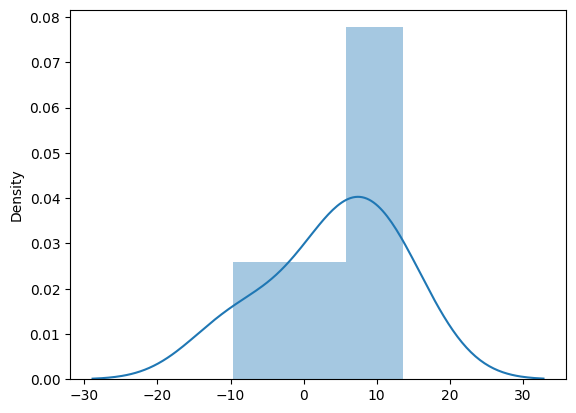

In [54]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

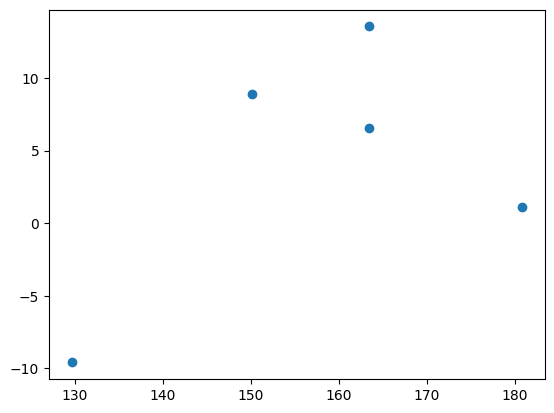

In [55]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)